In [1]:
import mujoco

In [17]:
import numpy as np
import numpy.random as rnd
from typing import Callable, Optional, Union, List
import scipy.linalg

# Graphics and plotting
!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install -q mediapy
import mediapy as media
import matplotlib.pyplot as plt

# More legible printing from numpy.
np.set_printoptions(precision=3, suppress=True, linewidth=100)

In [3]:
model = mujoco.MjModel.from_xml_path("half_cheetah.xml")

In [4]:
data = mujoco.MjData(model)
mujoco.mj_step(model, data)

""

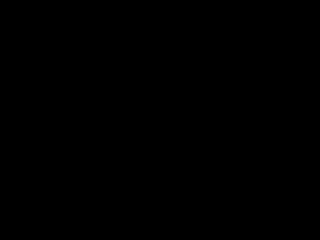

In [30]:
renderer = mujoco.Renderer(model)
media.show_image(renderer.render())

In [29]:
DURATION  = 5   # seconds
FRAMERATE = 60  # Hz

# Initialize to the standing-on-one-leg pose.
mujoco.mj_resetDataKeyframe(model, data, 1)

frames = []
while data.time < DURATION:
    
    # Random actuator force
    data.actuator_velocity = rnd.randn(6)*10
  
    # Step the simulation
    mujoco.mj_step(model, data)   
    
    # Render and save frames
#     if len(frames) < data.time * FRAMERATE:
    renderer.update_scene(data)
    pixels = renderer.render()
    frames.append(pixels)

# Display video.
media.show_video(frames, fps=FRAMERATE)